In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# 1. Load the data into the pandas environment and identify some basic details of the dataset.

In [2]:
data1 = pd.read_csv('employee.csv')
data1.head()

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,NaN,NaN,Operations,G3,723
1,S Kumar,NaN,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711


In [3]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               9 non-null      object 
 1   age                7 non-null      float64
 2   income             7 non-null      float64
 3   gender             7 non-null      object 
 4   department         9 non-null      object 
 5   grade              9 non-null      object 
 6   performance_score  9 non-null      int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 632.0+ bytes


In [4]:
data1.describe()

,age,income,performance_score
count,7.000000,7.000000,9.000000
mean,40.428571,52857.142857,610.666667
std,12.204605,26028.372797,235.671912
min,23.000000,16000.000000,53.000000
25%,31.000000,38500.000000,556.000000
50%,45.000000,52000.000000,674.000000
75%,49.500000,63500.000000,711.000000
max,54.000000,98000.000000,901.000000


# 2. Reset the index as "name".

In [5]:
data1 = pd.read_csv('employee.csv', index_col = 'name')
data1.head()

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711


# 3. Select rows for specific names Jack Morgan and Josh wills.

In [6]:
data1.loc[['Jack Morgan','Josh Wills']]

,age,income,gender,department,grade,performance_score
name,,,,,,
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Josh Wills,54.0,52000.0,F,Finance,G3,901


# 4. Select data for multiple values "Sales" and “Finance”.

In [7]:
data2 = data1[data1['department'].isin(['Sales', 'Finance'])]
data2

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


# 5. Display employee who has more than 700 performance score.

In [10]:
data1[data1['performance_score']>700]


,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


# 6. Display employee who has more than 500 and less than 700 performance score

In [13]:
data1[(data1['performance_score']>500) & (data1['performance_score']<700)]

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649


# 7. Check and handle missing values in the dataset

In [15]:
data1.isnull().sum()

age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

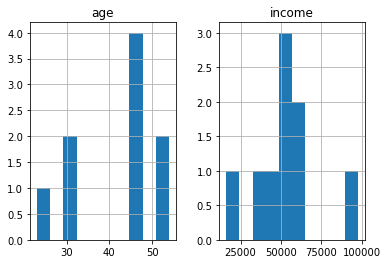

In [23]:
data3 = data1[['age','income']]
data3.hist()
plt.show()

In [24]:
data1['age']= data1['age'].fillna(data1['age'].median())
data1['income']= data1['income'].fillna(data1['income'].median())
data1['gender'] = data1['gender'].fillna(data1['gender'].mode().loc[0])

In [25]:
data1.head()

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,52000.0,F,Operations,G3,723
S Kumar,45.0,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711


In [26]:
data1.isnull().sum()

age                  0
income               0
gender               0
department           0
grade                0
performance_score    0
dtype: int64

# 8. Check the outliers and handle outliers in performance score using Percentiles

Text(0.5, 1.0, 'Box plot of performance_score')

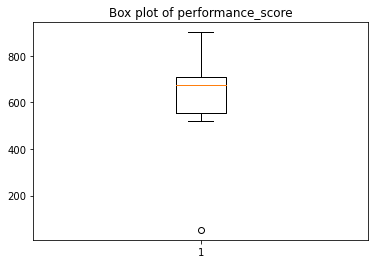

In [27]:
plt.boxplot(data1['performance_score'])
plt.title('Box plot of performance_score')

In [28]:
Q1 = np.percentile(data1['performance_score'],25,interpolation='midpoint')
Q2 = np.percentile(data1['performance_score'],50,interpolation='midpoint')
Q3 = np.percentile(data1['performance_score'],75,interpolation='midpoint')

In [31]:
IQR = Q3-Q1

low_lim = Q1-1.5*IQR
upper_lim =Q3+1.5*IQR

x = []
for i in data1['performance_score']:
        if((i<low_lim) or(i>upper_lim)):
            x.append(i)

In [32]:
print("Outlier", x)

Outlier [53]


# 9. Check the gender column and do Dummy encoding.

In [33]:
data_dummy = pd.get_dummies(data1, columns=['gender'])

In [34]:
data_dummy

,age,income,department,grade,performance_score,gender_F,gender_M
name,,,,,,,
Allen Smith,45.0,52000.0,Operations,G3,723,1,0
S Kumar,45.0,16000.0,Finance,G0,520,1,0
Jack Morgan,32.0,35000.0,Finance,G2,674,0,1
Ying Chin,45.0,65000.0,Sales,G3,556,1,0
Dheeraj Patel,30.0,42000.0,Operations,G2,711,1,0
Satyam Sharma,45.0,62000.0,Sales,G3,649,1,0
James Authur,54.0,52000.0,Operations,G3,53,1,0
Josh Wills,54.0,52000.0,Finance,G3,901,1,0
Leo Duck,23.0,98000.0,Sales,G4,709,0,1


# 10. Do the standard scaling on the feature performance score.

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
data1['performance_score'].describe()

count      9.000000
mean     610.666667
std      235.671912
min       53.000000
25%      556.000000
50%      674.000000
75%      711.000000
max      901.000000
Name: performance_score, dtype: float64

In [37]:
from sklearn  import preprocessing
scaler =preprocessing. StandardScaler()
StandScale = pd.DataFrame(data1['performance_score'])
StandScale = scaler.fit_transform(StandScale)
StandScale = pd.DataFrame(StandScale)

In [38]:
StandScale.describe()

,0
count,9.000000e+00
mean,2.035409e-16
std,1.060660e+00
min,-2.509823e+00
25%,-2.460317e-01
50%,2.850367e-01
75%,4.515581e-01
max,1.306668e+00
